# FARS Analysis

# Introduction

The objective is to use machine learning techniques for the evaluation and prediction of 'FARS' dataset. Exploratory data analysis has been performed including numerical and graphical summaries to identify patterns and trends
that extract relationships between feature and class variables. The study is carried out utilising a structured machine learning pipeline that commences with Data Pre-processing and Data cleaning, and advances through Model training, Prediction and Evaluation phases. The dataset undergoes fitting with diverse machine learning models and their performances are analyzed to identify the most effective model demonstrating significantly higher accuracy.

The FARS dataset contains a census of fatal traffic crashes that occurred inside the 50 states and the District of Columbia and resulted in the death of at least one person (occupant of a vehicle or a non-motorist) within 30 days of the crash. To assess the performance of models, various classifiers are utilized to predict the classes of specific records within the FARS dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
!pip install imblearn
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
!pip install skrebate
from skrebate import ReliefF
from collections import Counter
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

  Preparing metadata (setup.py) ... done
  Created wheel for skrebate: filename=skrebate-0.62-py3-none-any.whl size=29253 sha256=c5f03f6852c2b3f842cf8119f38d12e1e85f579490358d6b313738eb192b73e2
  Stored in directory: /root/.cache/pip/wheels/dd/67/40/683074a684607162bd0e34dcf7ccdfcab5861c3b2a83286f3a
Successfully built skrebate


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/FARS/fars.csv")

# Exploratory Data Analysis



The dataset contains 30 columns with a total of 100,968 records. It includes 29 feature variables and the last column is the target variable. There are a total of 8 distinct classes. The exploration and analysis of these features will be instrumental in developing and training machine learning models for the multi-class classification task where the goal is to predict the injury severity based on the given features.

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

In [ ]:
# Display the number of different class variables
print("Number of unique classes in the Target variable:", df['INJURY_SEVERITY'].nunique())

Number of unique classes in the Target variable: 8


The first 5 rows of the dataset is as below

In [ ]:
# Display the first 5 rows of the dataframe
df.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Air_Bag_Not_Available_for_this_Seat,Not_Ejected,Not_Ejected/Not_Applicable,Extricated,...,0,Not_Tested_for_Drugs,0,Not_a_Fatality_(Not_Applicable),Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_a_Fatality_(Not_Applicable),Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Deployed_Air_Bag_from_Front,Not_Ejected,Not_Ejected/Not_Applicable,Not_Extricated,...,0,Not_Tested_for_Drugs,0,Non-Hispanic,Yes,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Black,Fatal_Injury


The below table indicates that there are no missing values in any of the columns in the dataset.

In [ ]:
# Check for missing values
print(df.isnull().sum())

CASE_STATE                             0
AGE                                    0
SEX                                    0
PERSON_TYPE                            0
SEATING_POSITION                       0
RESTRAINT_SYSTEM-USE                   0
AIR_BAG_AVAILABILITY/DEPLOYMENT        0
EJECTION                               0
EJECTION_PATH                          0
EXTRICATION                            0
NON_MOTORIST_LOCATION                  0
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    0
METHOD_ALCOHOL_DETERMINATION           0
ALCOHOL_TEST_TYPE                      0
ALCOHOL_TEST_RESULT                    0
POLICE-REPORTED_DRUG_INVOLVEMENT       0
METHOD_OF_DRUG_DETERMINATION           0
DRUG_TEST_TYPE_(1_of_3)                0
DRUG_TEST_RESULTS_(1_of_3)             0
DRUG_TEST_TYPE_(2_of_3)                0
DRUG_TEST_RESULTS_(2_of_3)             0
DRUG_TEST_TYPE_(3_of_3)                0
DRUG_TEST_RESULTS_(3_of_3)             0
HISPANIC_ORIGIN                        0
TAKEN_TO_HOSPITA

The below summary provides an overview of the distribution of injury severities.

In [ ]:
# Display distribution of the target variable
target_distribution = df['INJURY_SEVERITY'].value_counts().reset_index()
target_distribution.columns = ['INJURY_SEVERITY', 'Count']
print(target_distribution)

                  INJURY_SEVERITY  Count
0                    Fatal_Injury  42116
1                       No_Injury  20007
2             Incapaciting_Injury  15072
3  Nonincapaciting_Evident_Injury  13890
4                 Possible_Injury   8674
5                         Unknown    901
6        Injured_Severity_Unknown    299
7          Died_Prior_to_Accident      9


The below plot illustrates the frequency of each injury severity category

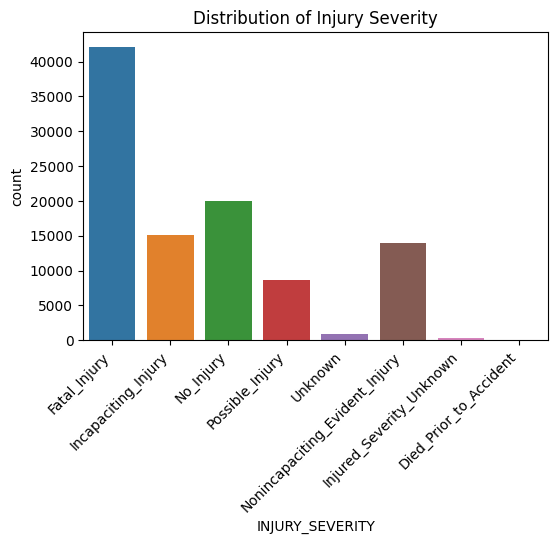

In [ ]:
# Visualize distribution of the target variable
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='INJURY_SEVERITY', data=df)
plt.title('Distribution of Injury Severity')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

The data is pre-processed by converting categorical text data to categorical numeric data using Label encoding. This numerical encoding is instrumental in enabling the models to recognize patterns and relationships within the data during the training phase.

In [ ]:
# Convert categorical text data to numerical data using Label Encoding
categorical_features = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Display the updated dataframe with numerical values for categorical features
df.head()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,0,34,1,1,3,7,2,2,9,1,...,0,2,0,5,0,27,29,19,17,1
1,0,20,1,1,3,7,9,2,9,1,...,0,2,0,5,0,27,29,19,17,1
2,0,43,1,1,3,5,4,0,0,0,...,0,2,0,5,0,27,29,19,4,1
3,0,38,0,6,6,5,4,0,0,0,...,0,2,0,6,2,27,29,19,11,2
4,0,50,1,1,3,5,9,0,0,1,...,0,2,0,5,2,27,29,19,4,1


The below table shows that the sole discrete value is Age. The 75th percentile is pretty comparable to the median with no significant difference. Consequently, outliers are in short supply. The majority of the characteristics are symmetrically distributed with little skewness. However, the maximum age is 99 which is an oddity. Other characteristics in the data set include primarily categorical data and no outliers are expected. The observed variation between each element demonstrates the significance of maintaining uniformity in the dataset.

In [ ]:
# Display basic statistics
df.describe()

,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
count,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,...,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000,100968.000000
mean,23.425977,37.106707,0.683880,3.155832,5.990700,6.400394,4.979053,0.254407,1.084571,0.914656,...,100.089672,2.258102,95.441556,6.098576,1.056018,26.849645,28.935366,19.007507,12.587612,2.782921
std,15.228212,22.109641,0.498972,2.551538,4.794034,1.900097,3.100175,0.670000,2.843937,0.319389,...,295.089512,0.905708,292.121277,1.063206,0.988896,3.256276,2.006201,0.807820,3.110742,1.853606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,20.000000,0.000000,1.000000,3.000000,5.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,0.000000,27.000000,29.000000,19.000000,11.000000,1.000000
50%,22.000000,32.000000,1.000000,1.000000,3.000000,7.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,29.000000,19.000000,11.000000,2.000000
75%,38.000000,49.000000,1.000000,6.000000,6.000000,7.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,6.000000,2.000000,27.000000,29.000000,19.000000,15.000000,4.000000
max,50.000000,99.000000,2.000000,9.000000,25.000000,11.000000,12.000000,3.000000,9.000000,2.000000,...,999.000000,6.000000,999.000000,8.000000,2.000000,44.000000,47.000000,32.000000,17.000000,7.000000


The below Correlation plot visually illustrates the relationships between pairs of variables in the dataset.

<Axes: >

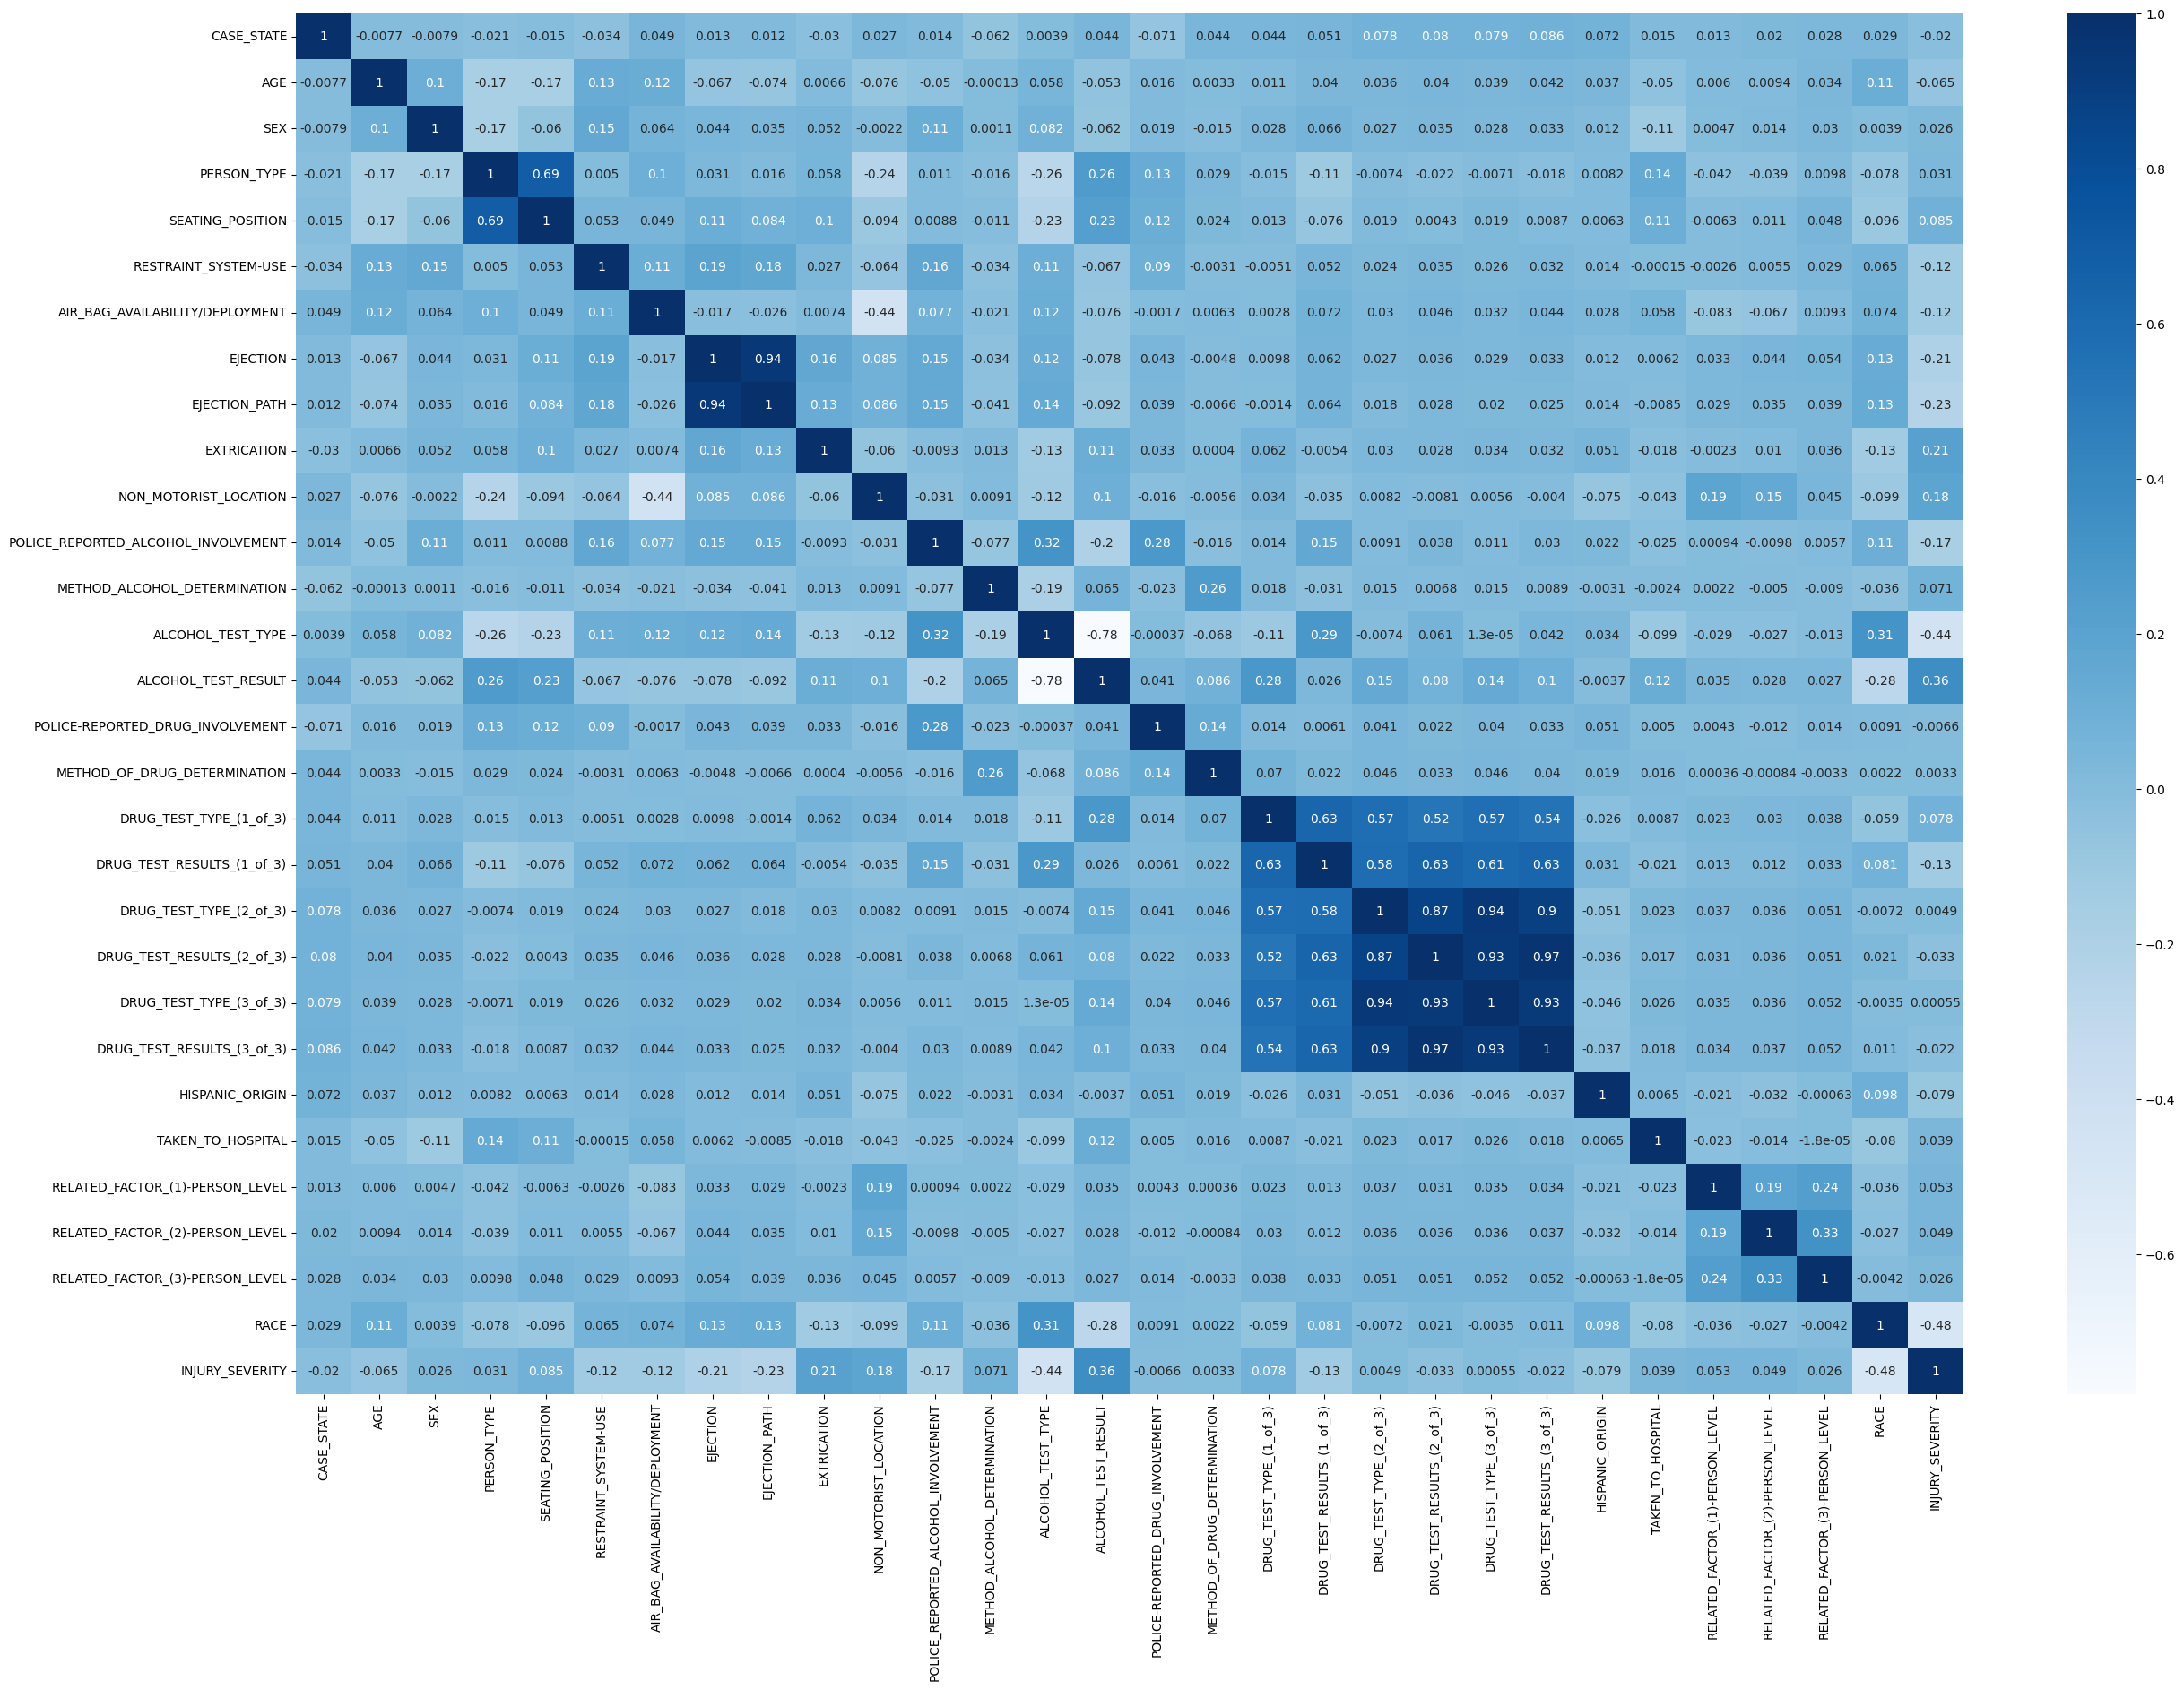

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Data Pre-processing

In [ ]:
# Extracting features (X) and the target variable (y) from the DataFrame df
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Class Imbalance Correction using SMOTE

The dataset exhibits an imbalance in the distribution of the target variable. SMOTE, a sampling technique, is used to mitigate the risk of model bias towards the majority class, enhancing the classifier's ability to learn patterns from the minority class. It creates synthetic samples by interpolating features of existing minority class instances, thereby balancing the dataset. This technique aids in achieving a more balanced representation, improving model performance and generalization. It can be observed that the class distribution becomes uniform after resampling.

In [ ]:
#SMOTE - Oversampling technique to balance the data for all the classes (Class Imbalance Correction)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distributions of the original and resampled target variable
print('Original class distribution:', Counter(y))
print('Resampled class distribution:', Counter(y_resampled))

Original class distribution: Counter({1: 42116, 4: 20007, 2: 15072, 5: 13890, 6: 8674, 7: 901, 3: 299, 0: 9})
Resampled class distribution: Counter({1: 42116, 2: 42116, 4: 42116, 6: 42116, 7: 42116, 5: 42116, 3: 42116, 0: 42116})


## Normalization using Standard Scaler

The standard scaler method is used to normalize the variance of features. This is particularly beneficial when the features in the dataset have varying scales.The majority of the categorical data has values of 0 or 1, but age feature exhibits a wide range of continuous values. Therefore, addressing this variation through appropriate scaling techniques such as standardization becomes crucial to ensure optimal model performance. The scaled values after standardisation are shown below.

In [ ]:
# Normalization using Standard Scaler

# Initialize StandardScaler for normalization
scaler = StandardScaler()

# Fit and transform the resampled training data using StandardScaler
X_Scaled = scaler.fit_transform(X_resampled)

# Create a DataFrame to display the normalized features
X_Scaled = pd.DataFrame(X_Scaled)
print(X_Scaled)

              0         1         2         3         4         5         6   \
0      -1.622902 -0.479702  0.365880 -0.798521 -0.574531  0.108097 -1.004792   
1      -1.622902 -0.950581  0.365880 -0.798521 -0.574531  0.108097  1.068368   
2      -1.622902 -0.176993  0.365880 -0.798521 -0.574531 -0.768004 -0.412461   
3      -1.622902 -0.345165 -1.179387  1.264885 -0.036674 -0.768004 -0.412461   
4      -1.622902  0.058446  0.365880 -0.798521 -0.574531 -0.768004  1.068368   
...          ...       ...       ...       ...       ...       ...       ...   
336923  0.647024  1.706524  1.911146 -0.798521 -0.574531  1.860297  1.956865   
336924  1.610023  1.706524  1.911146 -0.798521 -0.574531  1.860297  1.956865   
336925  1.059738  1.706524  1.911146 -0.798521 -0.574531  1.860297 -0.412461   
336926  0.990952  1.706524  1.911146  1.264885  3.369751  1.860297  1.956865   
336927  0.647024  1.706524  1.911146 -0.798521 -0.574531  1.860297  1.956865   

              7         8         9   .

# Model Training

## 1. Random Forest Classifier

The Random Forest Classifier is an ensemble learning algorithm used for multi-class classification tasks. It constructs a multitude of decision trees during training and outputs the mode of the classes. Various techniques are applied to enhance the model's predictive performance. Recursive Feature Elimination (RFE) is utilized for feature selection. Hyperparameter tuning is performed using GridSearchCV using different configurations of feature selection and the number of trees in the Random Forest for determining the combination that maximizes the F1-score during cross-validation. The construction of a pipeline streamlines the process combining feature selection and model training. The model achieved a good accuracy score of 74%.

In [ ]:
# Random Forest Classifier

#Instantiate the RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, max_depth=3,class_weight="balanced")

# Feature Selection using Recursive Feature Elimination (RFE) with a RandomForestClassifier
selector = RFE(classifier, step=1)
# Creating a Pipeline with Feature Selection and RandomForestClassifier
pipeline = Pipeline([("FS", selector), ("classifier",classifier)])

# Define the grid of hyperparameters for GridSearchCV
param_grid = dict(
        FS__n_features_to_select=[5,10,20],
        classifier__n_estimators=[100,200]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning and Feature Selection using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring="f1", verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_estimator = grid_search.best_estimator_
num_feat = best_estimator.named_steps['FS'].n_features_to_select
print("Number of selected features {0}".format(num_feat))

# Evaluation on the Test Set
y_test_pred_best = best_estimator.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_best, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_best))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_best))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Number of selected features 5
Test Data Accuracy

Confusion Matrix: 
 [[   2    0    0    0  379    7   65    2]
 [   0 8450    0    0    0    0    0    0]
 [   0    0 3005   54   10 2531 1041    4]
 [   0    0   32   19    0   30   22    0]
 [   0    4   22    3 3370  173  534   21]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0   19    2    3  230    2   11  147]]
Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.01         2
           1       1.00      1.00      1.00      8473
           2       0.45      0.98      0.62      3061
           3       0.18      0.24      0.21        79
           4       0.82      0.84      0.83      3989
           5       0.00      0.00      0.00      2743
           6       0.00      0.00      0.00      1673
           7       0.36      0.84      0.50       174

    accuracy                

## 2. K-Nearest Neighbors Classifier

The K-Nearest Neighbors (KNN) Classifier is a versatile and intuitive algorithm which predicts the class of a data point based on the majority class among its k-nearest neighbors in the feature space. The data which was resampled using SMOTE to address class imbalance and further scaled using normalization technique is fed into the model. K-Nearest Neighbors is not ideal for large datasets primarily due to its computational inefficiency and memory requirements. However, KNN excels in multi-class classification tasks. The model is fine-tuned using GridSearchCV to identify the optimal number of neighbors for maximizing the F1-score. The model achieved a high accuracy score of 88%. The confusion matrix shows that the KNN classifier achieved high accuracy particularly with an abundance of true positives and true negatives.

In [ ]:
# K-Nearest Neighbors Classifier

# Instantiate the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = dict(n_neighbors=[1, 5, 10])
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring="f1", verbose=0, n_jobs=4)
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new KNeighborsClassifier
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_train, y_train)

# Evaluation on the Test Set
y_test_pred_best_knn = best_knn_classifier.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_best_knn, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_best_knn))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_best_knn))

Test Data Accuracy

Confusion Matrix: 
 [[8411    0    0    0    2    0    1    0]
 [   0 8455    7    0    0    1    0    1]
 [   0   16 6336    7   12 1308  578    1]
 [   0    1   43 8355    7   45   35    0]
 [   0    6   18    0 7331  149  709   51]
 [   0    6 1411   13  146 6015  854    9]
 [   0    4  642   10  762  874 6214   14]
 [   0   17    4    1  167   13   35 8289]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8411
           1       1.00      0.99      1.00      8505
           2       0.77      0.75      0.76      8461
           3       0.98      1.00      0.99      8386
           4       0.89      0.87      0.88      8427
           5       0.71      0.72      0.71      8405
           6       0.73      0.74      0.73      8426
           7       0.97      0.99      0.98      8365

    accuracy                           0.88     67386
   macro avg       0.88      0.88      0.88     67386
weighted a

## 3. Decision Tree Classifier

A decision tree is a predictive modeling approach that sequentially partitions data into subsets based on features, leading to a tree-like structure of decisions from root to leaf nodes. The decision tree technique is used here to train the data learning fundamental decision rules from historical training data to predict class labels. The model is trained on class imbalance-corrected data reducing bias which yielded a high accuracy of 88%.

In [ ]:
# Decision Tree Classifier

# Instantiate the DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit the model on the training set
decision_tree_classifier.fit(X_train, y_train)

# Predictions on the test set
y_test_pred_dt = decision_tree_classifier.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_dt, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_dt))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_dt))

Test Data Accuracy

Confusion Matrix: 
 [[8409    1    1    0    4    1    2    0]
 [   0 8477    1    0    1    0    2    1]
 [   0    1 6475   12    7 1423  606    2]
 [   0    0   54 8351    3   68   28    3]
 [   0    3    9    1 7467  149  742   41]
 [   1    4 1328   10  105 5913  896    4]
 [   1    2  591   10  665  838 6105   26]
 [   0   17    2    2  175   13   45 8288]]
Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8411
           1       1.00      1.00      1.00      8505
           2       0.76      0.77      0.76      8461
           3       0.98      1.00      0.99      8386
           4       0.89      0.89      0.89      8427
           5       0.72      0.70      0.71      8405
           6       0.74      0.72      0.73      8426
           7       0.97      0.99      0.98      8365

    accuracy                           0.88     67386
   macro avg       0.88      0.88      0.88     67386
weighted a

## 4. Logistic Regression

Logistic regression may not be the most optimal solution when the task involves categorizing data samples into more than two groups. However, we can typically use an extension of logistic regression designed for multi-class scenarios known as One-vs-Rest method. Each class will be handled as a binary classification problem where 1 signifies that the sample belongs to a particular class and 0 indicates that it does not. In this logistic regression approach, a sigmoid function is used which produces a value of 1 if the sigmoid function returns value is greater than 0.5 and 0 if it is less than 0.5.

The standardised data is fed into the regression model as input. The model is fine-tuned using GridSearchCV to identify the optimal value of inverse of regularization strength and the type of penalty. The accuracy achieved is 66%, which is low when compared with the other models used.

In [ ]:
# Logistic Regression

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
logistic_regression = LogisticRegression()

# Define the hyperparameter grid for tuning
param_grid = {
    'penalty': ['l2', 'none'],            # Regularization penalty: l2 (Ridge) or none
    'C': [0.001, 0.01, 0.1, 1, 10, 100]   # Inverse of regularization strength
}

# Hyperparameter Tuning using GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring="f1", verbose=1, n_jobs=4)
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new Logistic Regression model
best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train, y_train)

# Evaluation on the Test Set
y_test_pred_best_lr = best_logistic_regression.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_best_lr, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_best_lr))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_best_lr))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test Data Accuracy

Confusion Matrix: 
 [[8286  183   35   26  495   57  217  123]
 [   0 7431   42   55   77   54  127   77]
 [   0  148 3072  677    0 1443  556   60]
 [   0  162 1303 5322    4 1254  784   37]
 [ 125  314    4  145 7176  272 2411  652]
 [   0  111 3742 1662   11 4749 2931   21]
 [   0   85  255  220   52  534 1314  287]
 [   0   71    8  279  612   42   86 7108]]
Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      8411
           1       0.95      0.87      0.91      8505
           2       0.52      0.36      0.43      8461
           3       0.60      0.63      0.62      8386
           4       0.65      0.85      0.74      8427
           5       0.36      0.57      0.44      8405
           6       0.48      0.16      0.24      8426
           7       0.87      0.85      0.86      8365

    accuracy                           0.66     67386
   

## 5. XGB Classifier

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning algorithm that combines the strengths of decision trees to boost predictive performance. In multi-class classification problems, XGBoost extends its capability by employing a one-vs-all strategy, training multiple decision trees to distinguish each class from the rest. The algorithm iteratively refines the model, optimizing a weighted sum of classification errors to enhance overall predictive accuracy across multiple classes. Hyperparameter tuning is performed using GridSearchCV using different configurations of learning rate, no of estimators and max depth. The model achieved a good accuracy score of 74%.

In [ ]:
# XGBClassifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y_resampled, test_size=0.2, random_state=42)

# Instantiate the XGBClassifier
xgb_classifier = XGBClassifier()

# Hyperparameter Tuning on the Validation Set
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 200, 500],
              'max_depth': [3, 5, 7]}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring="f1", verbose=0, n_jobs=4)
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_

# Using the best parameters to create a new XGBClassifier
best_xgb_classifier = XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Evaluation on the Test Set
y_test_pred_best_xgb = best_xgb_classifier.predict(X_test)

# Print results for the test dataset
print('Test Data Accuracy\n')
print('Confusion Matrix: \n', confusion_matrix(y_test_pred_best_xgb, y_test))
print('Report:\n', classification_report(y_test, y_test_pred_best_xgb))
print('Accuracy: ', accuracy_score(y_test, y_test_pred_best_xgb))

Test Data Accuracy

Confusion Matrix: 
 [[8410    0    2   13  216   27  106   21]
 [   0 8489    1    0    0    0    0    2]
 [   0    0 4403  415    1 1975  854    7]
 [   0    0  244 6941    6  293  273   32]
 [   1    0    3  132 7789  309 2535  640]
 [   0    0 3624  694   10 5312 3206   20]
 [   0    0  143   99   65  421 1357  173]
 [   0   16   41   92  340   68   95 7470]]
Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8411
           1       1.00      1.00      1.00      8505
           2       0.58      0.52      0.55      8461
           3       0.89      0.83      0.86      8386
           4       0.68      0.92      0.79      8427
           5       0.41      0.63      0.50      8405
           6       0.60      0.16      0.25      8426
           7       0.92      0.89      0.91      8365

    accuracy                           0.74     67386
   macro avg       0.75      0.74      0.73     67386
weighted a

# Conclusion

All the models achieved excellent accuracy with the KNN Classifier and Decision Tree standing out as the most effective classifiers for this multi-class classification problem on the FARS dataset. The Decision Tree Classifier and KNN Classifier exhibit similar overall accuracies of approximately 88% on the test data. Utilizing oversampling techniques such as SMOTE is a vital step that helped in achieving the accuracy of these models. The next best classifiers are Random Forest and XGB Classifier, both having an accuracy of 74% with very marginal difference between them. On the other hand, Logistic regression demonstrated a lower accuracy of 66% in classifying distinct classes.








